In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
path = 'ex2data1.txt'
data = pd.read_csv(path,names=['x1','x2','y'])
data.head()

,x1,x2,y
0,34.623660,78.024693,0
1,30.286711,43.894998,0
2,35.847409,72.902198,0
3,60.182599,86.308552,1
4,79.032736,75.344376,1


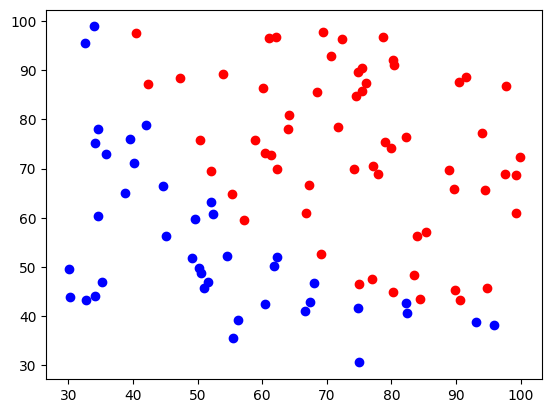

In [3]:
positive = data[data['y'].isin([1])]
negative = data[data['y'].isin([0])]
plt.scatter(positive['x1'],positive['x2'],c='r')
plt.scatter(negative['x1'],negative['x2'],c='b')
plt.show()

In [4]:
data.insert(0,'b',1)

In [5]:
X = data.iloc[:,0:3].values
Y = data.iloc[:,3:].values
w = np.matrix([0,0,0])
w = np.float64(w)

In [6]:
def sigmoid(X):
    return 1 / (np.exp(-X) + 1)

In [7]:
def cost(X,Y,w):
    first = -Y * np.log(sigmoid(X@w.T))
    second = -(1-Y) * np.log(1-sigmoid(X@w.T))
    return first + second

In [8]:
def gradient_descent(X,Y,w,lr,iter):

    for i in range(iter):

        error = sigmoid(X@w.T) - Y
        
        tem = X.T@error

        w -= tem.T *lr /len(X)
        
    return w

In [9]:
w = gradient_descent(X,Y,w,0.004,300000)

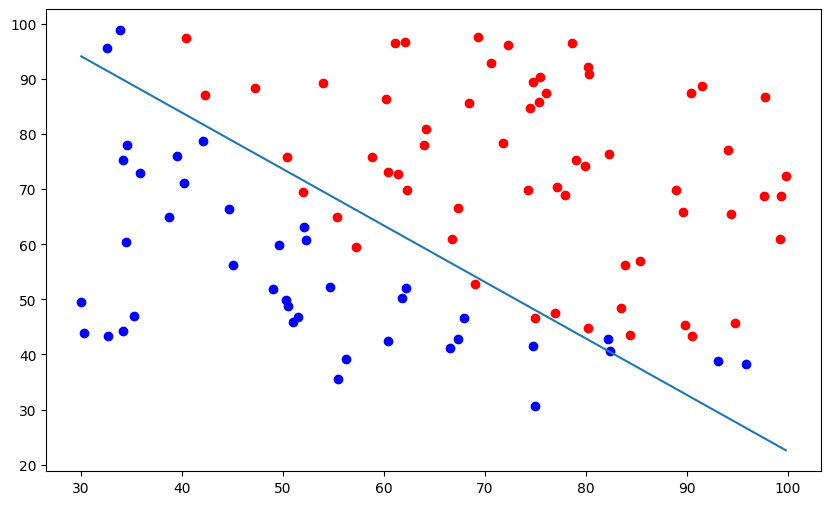

In [10]:
para1 = -w[0,0] / w[0,2]
para2 = -w[0,1] / w[0,2]
fig,ax = plt.subplots(figsize=(10,6))
x = data['x1'].min()
y = data['x1'].max()
xx = np.linspace(x,y,10)
yy = para1 + para2 * xx
ax.scatter(positive['x1'],positive['x2'],c='r')
ax.scatter(negative['x1'],negative['x2'],c='b')
ax.plot(xx,yy)
plt.show()